# Проект по изучению данных о горячих точках терроризма

## Задание

Представьте, что вы аналитик в области безопасности или обороны. Проанализируйте данные и сделайте выводы о распределении и характере террористических инцидентов, зафиксированных по всему миру. В свой анализ включите карты, визуализирующие местоположение различных инцидентов. 

Ваш анализ также может дать ответы на следующие вопросы:

1. Как менялось количество террористических актов на протяжении многих лет? Есть ли определенные регионы, где эта тенденция отличается от среднемировых показателей?

2. Коррелирует ли количество инцидентов и число жертв? Можете ли вы выявить какие-либо отклонения или выбросы?

3. Каковы наиболее распространенные методы нападений? Отличаются ли они в разных регионах или во времени?

4. Нанесите места нападений на карту, чтобы наглядно представить их региональное распространение.

Вы также можете продолжить изучение данных и извлечь дополнительные выводы, помимо вышеперечисленных вопросов.

## Описание данных

Предоставленный сжатый файл globalterrorismdb_0718dist.tar.bz2 является извлечением из Глобальной базы данных терроризма (GTD) - базы данных с открытым исходным кодом, включающей информацию о террористических атаках по всему миру с 1970 по 2017 год. GTD включает в себя систематизированные данные о внутренних и международных террористических инцидентах, произошедших за этот период времени, и на сегодняшний день насчитывает более 180 000 атак. База данных ведется исследователями Национального консорциума по изучению терроризма и ответных мер на терроризм (START), штаб-квартира которого находится в Университете Мэриленда.

Поскольку количество переменных и экземпляров очень велико, для этого проекта не стесняйтесь выбрать подмножество столбцов или конкретный период времени.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Импорт базы данных
df = pd.read_csv(r'C:\Users\Tolya\Desktop\test progs\Terrorism Hotspots\datasets\globalterrorismdb_0718dist.tar.bz2', 
                compression='bz2', 
                usecols=[
    'iyear','imonth','iday','country_txt','region_txt','city','latitude','longitude','location','motive',
    'success','suicide','attacktype1','attacktype1_txt','targtype1_txt',
    'targsubtype1_txt','target1','natlty1_txt','gname','gsubname','nperps',
    'weaptype1_txt','weapsubtype1_txt','nkill','nkillus'])

## Пояснения к выбранным столбцам:

success - Успех террористической атаки

suicide - 1 = «Да» Инцидент был атакой самоубийцы. 0 = «Нет» Нет никаких признаков того, что инцидент был самоубийством.

attacktype1 - Общий метод нападения

attacktype1_txt - Общий метод нападения и широкий класс используемых тактик.

targtype1_txt - Общий тип цели/жертвы

targsubtype1_txt - Более конкретная категория цели

target1 - Конкретный человек, здание, установка, ставшие объектом атаки и/или жертвой.

natlty1_txt - Национальность цели, подвергшейся нападению

gname - Название группы, осуществившей атаку

gsubname - Дополнительные сведения о группе, осуществившей атаку, например фракции

nperps - Общее количество террористов, участвовавших в инциденте

weaptype1_txt - Общий тип оружия, использованного в инциденте

weapsubtype1_txt - Более конкретное значение для большинства типов оружия

nkill - Общее количество подтвержденных смертей в инциденте

nkillus - Число граждан США, погибших в результате инцидента

In [3]:
df.head(3)

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,location,success,...,target1,natlty1_txt,gname,gsubname,motive,nperps,weaptype1_txt,weapsubtype1_txt,nkill,nkillus
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,1,...,Julio Guzman,Dominican Republic,MANO-D,NaN,NaN,NaN,Unknown,NaN,1.0,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,1,...,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,NaN,7.0,Unknown,NaN,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,1,...,Employee,United States,Unknown,NaN,NaN,NaN,Unknown,NaN,1.0,NaN


In [4]:
df.isnull().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
region_txt               0
city                   434
latitude              4556
longitude             4557
location            126196
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
target1                636
natlty1_txt           1559
gname                    0
gsubname            175801
motive              131130
nperps               71115
weaptype1_txt            0
weapsubtype1_txt     20768
nkill                10313
nkillus              64446
dtype: int64

## Задание 1: 
Как менялось количество террористических актов на протяжении многих лет? Есть ли определенные регионы, где эта тенденция отличается от среднемировых показателей?

In [5]:
#Нахождение количества атак в год
attacks_per_year = df.groupby('iyear').size().to_frame('number_of_attacks').reset_index()
attacks_per_year['total_attacks'] = attacks_per_year['number_of_attacks'].cumsum()
attacks_per_year.head(5)

,iyear,number_of_attacks,total_attacks
0,1970,651,651
1,1971,471,1122
2,1972,568,1690
3,1973,473,2163
4,1974,581,2744


Text(0.5, 1.0, 'Общее количество террористических актов')

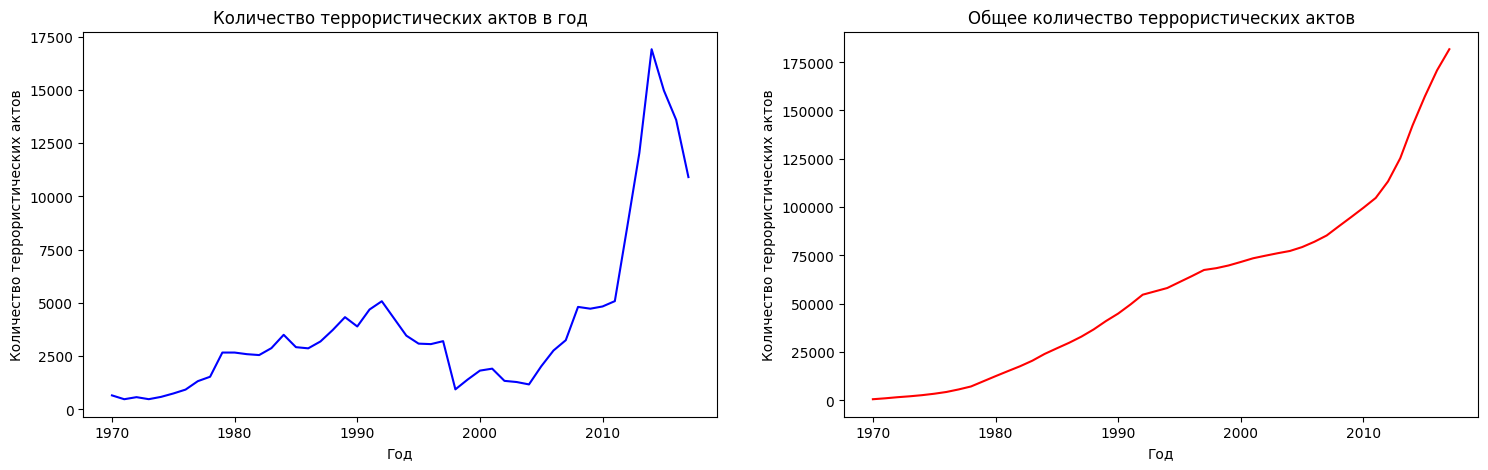

In [6]:
import matplotlib.pyplot as plt

#Вывод графика количества террористических актов за каждый год
fig = plt.figure(figsize=(18, 5))
graph1 = fig.add_subplot(1,2,1)
graph1.plot(attacks_per_year['iyear'],attacks_per_year['number_of_attacks'], 'b')
plt.xlabel('Год')
plt.ylabel('Количество террористических актов')
plt.title('Количество террористических актов в год')

#Вывод графика общего количества террористических актов
graph2 = fig.add_subplot(1,2,2)
graph2.plot(attacks_per_year['iyear'],attacks_per_year['total_attacks'], 'r')
plt.xlabel('Год')
plt.ylabel('Количество террористических актов')
plt.title('Общее количество террористических актов')


In [7]:
#Количество атак в год по регионам
region_per_year = df.groupby(['region_txt', 'iyear']).size().to_frame('number_of_attacks').reset_index()
region_per_year.head(3)

,region_txt,iyear,number_of_attacks
0,Australasia & Oceania,1970,1
1,Australasia & Oceania,1971,1
2,Australasia & Oceania,1972,8


In [8]:
#Среднее количество атак в год
mean_per_year=region_per_year.groupby('iyear')['number_of_attacks'].mean().to_frame('mean_number_of_attacks').reset_index()
mean_per_year.head(3)

,iyear,mean_number_of_attacks
0,1970,59.181818
1,1971,47.100000
2,1972,56.800000


In [9]:
#Общее количество атак по регионам
region_sum = df.groupby('region_txt').size().to_frame('number_of_attacks').reset_index().sort_values('number_of_attacks', ascending=False)
region_sum.head(3)

,region_txt,number_of_attacks
5,Middle East & North Africa,50474
8,South Asia,44974
7,South America,18978


Text(0.5, 1.0, 'Общее количество террористических актов по регионам')

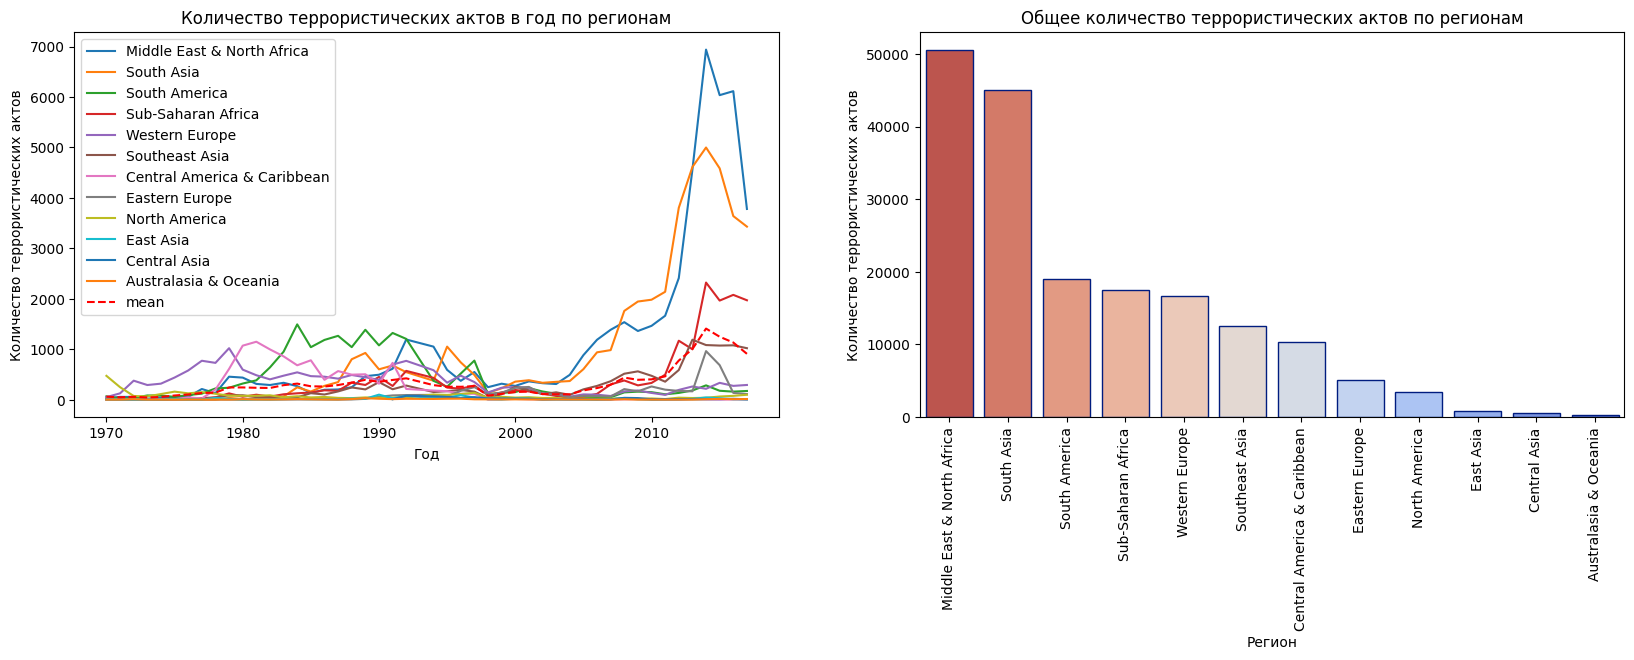

In [10]:
fig = plt.figure(figsize=(20, 5))
#Вывод графика количества атак в год по регионам вместе со средним количеством атак
graph1 = fig.add_subplot(121)
regions  = region_sum['region_txt'].unique()
for i in range(len(regions)):
    graph1.plot(region_per_year[region_per_year['region_txt']==regions[i]]['iyear'], region_per_year[region_per_year['region_txt']==regions[i]]['number_of_attacks'], label=regions[i])
graph1.plot(mean_per_year['iyear'], mean_per_year['mean_number_of_attacks'], label='mean', ls='--', c='r')
graph1.legend()
plt.xlabel('Год')
plt.ylabel('Количество террористических актов')
plt.title('Количество террористических актов в год по регионам')

#Вывод графика общего количества атак по регионам
graph2 = fig.add_subplot(122)
sns.barplot(x=region_sum['region_txt'], y=region_sum['number_of_attacks'], hue=region_sum['region_txt'], palette= 'coolwarm_r', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.xlabel('Регион')
plt.ylabel('Количество террористических актов')
plt.title('Общее количество террористических актов по регионам')

## Задание 2: 
Коррелирует ли количество инцидентов и число жертв? Можете ли вы выявить какие-либо отклонения или выбросы?

In [11]:
#Нахождение корреляции количества инцидентов и числа жертв
inc_cas=pd.merge(df.groupby('iyear').size().to_frame('incidents'), df.groupby('iyear')['nkill'].sum().to_frame('casualties'), on='iyear')
inc_cas.corr()

,incidents,casualties
incidents,1.000000,0.966005
casualties,0.966005,1.000000


Text(7.124999999999995, 0.5, 'Число жертв')

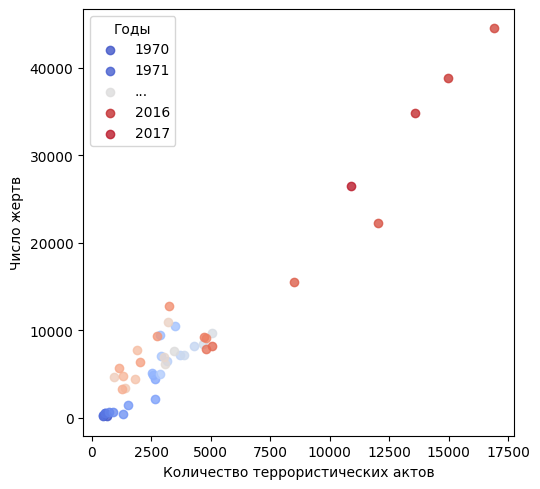

In [12]:
inc_cas=inc_cas.reset_index()

#Визуализация корреляции количества инцидентов и числа жертв
graph1=sns.lmplot(data=inc_cas, x='incidents', y='casualties', hue='iyear', palette='coolwarm', legend=False, height=5, aspect=5.5/5)

handles, labels = graph1.ax.get_legend_handles_labels()

graph1.ax.legend([handles[0], handles[1], handles[len(handles)//2], handles[-2], handles[-1]], [labels[0], labels[1], '...', labels[-2], labels[-1]], title="Годы", loc='upper left')
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
plt.xlabel('Количество террористических актов')
plt.ylabel('Число жертв')

In [13]:
from sklearn.ensemble import IsolationForest
#Для нахождения выбросов используется Isolation Forest алгоритм
outlierData = inc_cas[['incidents','casualties']].values

clf = IsolationForest(contamination=0.05)

clf.fit(outlierData)

inc_cas['anomaly'] = clf.predict(outlierData)

Text(0, 0.5, 'Число жертв')

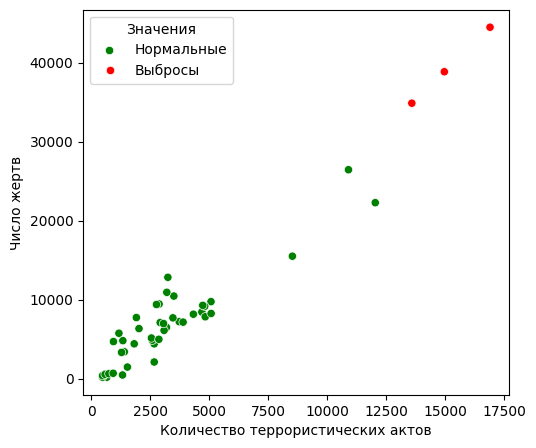

In [14]:
#Визуализация выбросов
plt.figure(figsize=(5.5, 5))
graph1 = sns.scatterplot(data=inc_cas, x='incidents', y='casualties', hue='anomaly', palette={1: 'green', -1: 'red'})
plt.legend(title='Значения', labels=['Нормальные', 'Выбросы'], loc='upper left')

plt.xlabel('Количество террористических актов')
plt.ylabel('Число жертв')

## Задание 3: 
Каковы наиболее распространенные методы нападений? Отличаются ли они в разных регионах или во времени?

In [15]:
#Нахождение наиболее распространенных методов нападений
common_methods_of_attack = df.groupby('attacktype1_txt').size().to_frame('count').sort_values('count', ascending=False)
common_methods_of_attack

,count
attacktype1_txt,
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


In [16]:
#Нахождение количества атак на каждый тип атаки за каждый год
method_of_attack_per_year = df.groupby(['iyear', 'attacktype1_txt']).size().to_frame('count')
pvmethod_of_attack_per_year = method_of_attack_per_year.reset_index().pivot(index='attacktype1_txt', columns='iyear', values='count')

Text(50.7222222222222, 0.5, 'Тип акта')

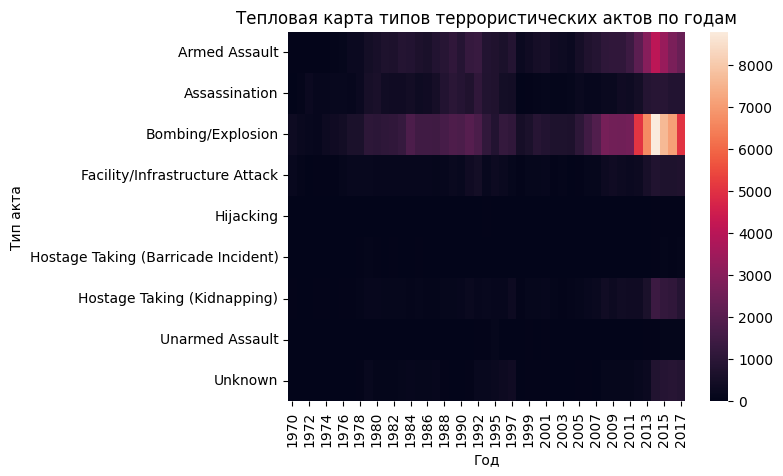

In [17]:
#Вывод тепловой карты типов атак по годам
sns.heatmap(pvmethod_of_attack_per_year.fillna(0))
plt.title('Тепловая карта типов террористических актов по годам')
plt.xlabel('Год')
plt.ylabel('Тип акта')

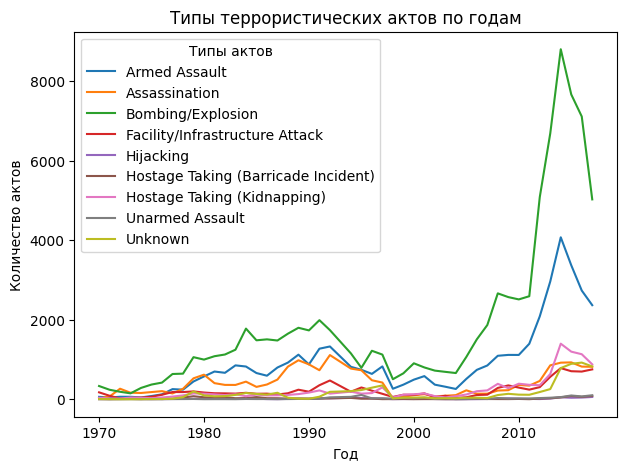

In [18]:
#Вывод графика количества атак по типам за каждый год
plt.figure(figsize=(7, 5))
sns.lineplot(data=method_of_attack_per_year, x='iyear', y='count', hue='attacktype1_txt')
plt.title('Типы террористических актов по годам')
plt.xlabel('Год')
plt.ylabel('Количество актов')
plt.legend(title='Типы актов')

In [19]:
#Нахождение количества атак на каждый тип атаки по регионам
method_of_attack_per_region = df.groupby(['region_txt', 'attacktype1_txt']).size().to_frame('count')
pvmethod_of_attack_per_region = method_of_attack_per_region.reset_index().pivot(index='attacktype1_txt', columns='region_txt', values='count')

Text(0.5, 23.52222222222222, 'Регион')

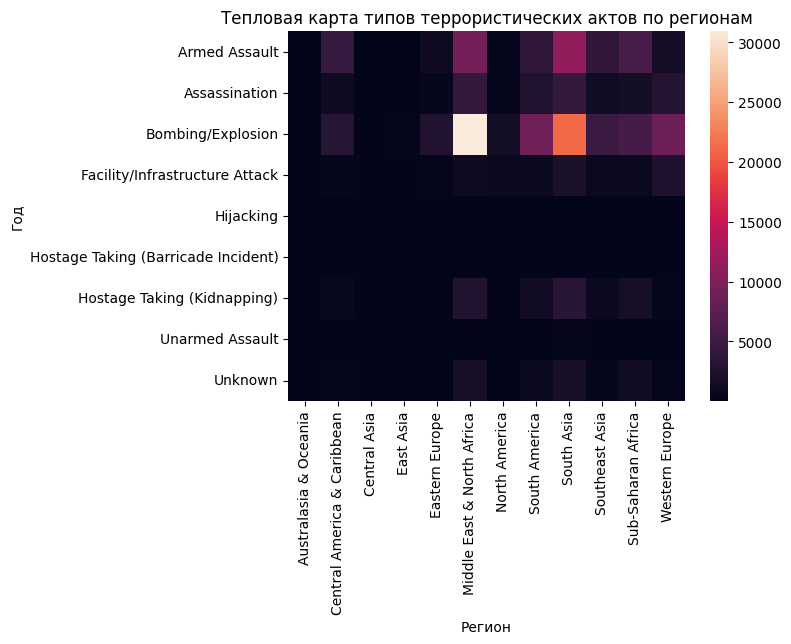

In [20]:
#Вывод тепловой карты типов атак по регионам
sns.heatmap(pvmethod_of_attack_per_region.fillna(0))
plt.title('Тепловая карта типов террористических актов по регионам')
plt.ylabel('Год')
plt.xlabel('Регион')

Text(0.5, 1.0, 'Частота типов террористических актов по регионам')

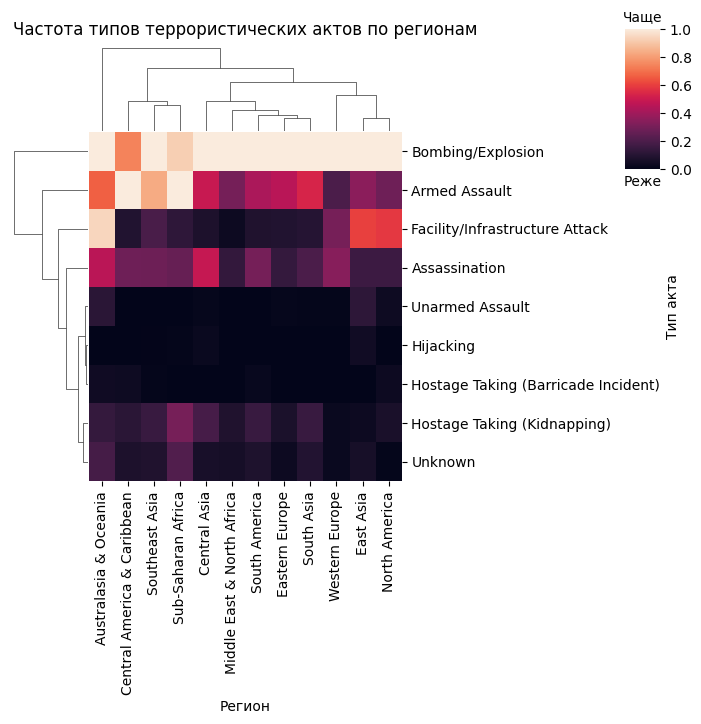

In [21]:
#Визуализация наиболее часто используемых типов атак по регионам
graph1 = sns.clustermap(pvmethod_of_attack_per_region, standard_scale=1, figsize=(7,7), cbar_pos=(0.9,0.8,0.05,0.2))
plt.title('Чаще', fontsize = 10)
plt.xlabel('Реже')
graph1.ax_heatmap.set_xlabel('Регион')
graph1.ax_heatmap.set_ylabel('Тип акта')
graph1.ax_heatmap.set_title('Частота типов террористических актов по регионам', pad=70)

## Задание 4: 
Нанесите места нападений на карту, чтобы наглядно представить их региональное распространение.

In [22]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
pio.renderers.default = "png"

In [23]:
#Таблица с координатами атак
location_points = df[['country_txt','latitude', 'longitude']]
location_points.head(3)

,country_txt,latitude,longitude
0,Dominican Republic,18.456792,-69.951164
1,Mexico,19.371887,-99.086624
2,Philippines,15.478598,120.599741


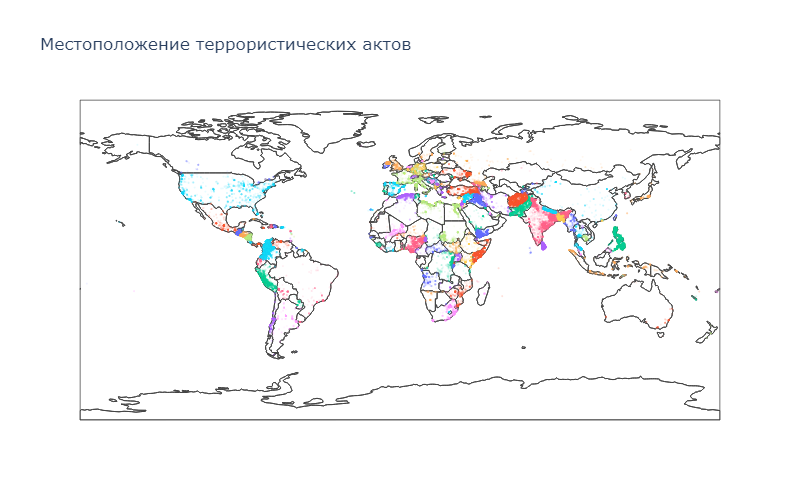

In [24]:
#Визуализация местоположения атак
fig = px.scatter_geo(location_points, lon='longitude', lat='latitude',
                    title='Местоположение террористических актов',
                    color='country_txt',
                    size_max=0.1,
                    hover_name='country_txt',
                    width = 800, height = 500)

fig.update_geos(showcountries=True, landcolor='white')
fig.update_traces(marker_opacity=0.1, marker_size=2)
fig.update_layout(showlegend=False)
fig.show()

In [25]:
#Нахождение количества атак на страну
incident_sum = location_points.groupby('country_txt').size().to_frame('incident_count').reset_index()
incident_sum.head(3)

,country_txt,incident_count
0,Afghanistan,12731
1,Albania,80
2,Algeria,2743


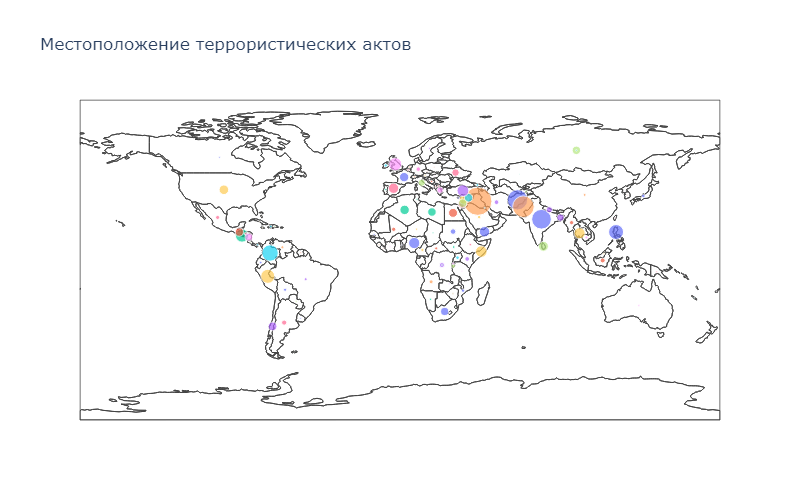

In [26]:
#Вывод картограммы с количеством атак на страну
fig = px.scatter_geo(incident_sum, locations='country_txt', locationmode='country names',
                    title='Местоположение террористических актов',
                    color='country_txt',
                    size='incident_count',
                    hover_name='country_txt',
                    width = 800, height = 500)

fig.update_geos(showcountries=True, landcolor='white')
fig.update_layout(showlegend=False)
fig.show()